<a href="https://colab.research.google.com/github/TFVO11/CapstoneDesign_Data_Analyzer/blob/main/RadonDataAnalyzerVer_0_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
cd 'gdrive/My Drive/Colab Notebooks/ArimSci_machineLearning'

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/ArimSci_machineLearning'
/content/gdrive/My Drive/Colab Notebooks/ArimSci_machineLearning


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#함수

#### 전처리 자동화 함수

In [55]:
def splitingData(initDataSet):
  forenoonData, afternoonData = initDataSet[:][:500], initDataSet[:][500:]
  return (forenoonData, afternoonData);

In [56]:
def sectionSplitedData(splitedData):
  radonData, humiData, tempData, pressData = splitedData.filter(['radon']),splitedData.filter(['humi']), splitedData.filter(['temp']), splitedData.filter(['pressure'])
  return (radonData, humiData, tempData, pressData);

In [57]:
def organizingData(initData):
  forenoonData, afternoonData = splitingData(initData)
  foreRadonDataSet, foreHumiDataSet, foreTempDataSet, forePressDataSet = sectionSplitedData(forenoonData)
  afterRadonDataSet, afterHumiDataSet, afterTempDataSet, afterPressDataSet = sectionSplitedData(afternoonData)
  return (foreRadonDataSet, foreHumiDataSet, foreTempDataSet, forePressDataSet, afterRadonDataSet, afterHumiDataSet, afterTempDataSet, afterPressDataSet)

## 데이터 불러오기

In [58]:
initDf = pd.read_excel('data/DataExport3.xls')

## 데이터 전처리(자동화)

In [81]:
forenoonData, afterData = splitingData(initDf)
radon, humi, temp, press = sectionSplitedData(initDf)
foreRadon, foreHumi, foreTemp, forePress, afterRadon, afterHumi, afterTemp, afterPress = organizingData(initDf)
foreRH, foreRT, foreRP = pd.concat([foreRadon, foreHumi], axis = 1), pd.concat([foreRadon, foreTemp], axis = 1), pd.concat([foreRadon, forePress], axis = 1)
afterRH, afterRT, afterRP = pd.concat([afterRadon, afterHumi], axis = 1), pd.concat([afterRadon, afterTemp], axis = 1), pd.concat([afterRadon, afterPress], axis = 1)
totalRH, totalRT, totalRP = pd.concat([radon, humi], axis = 1), pd.concat([radon, temp], axis = 1), pd.concat([radon, press], axis = 1)

## 데이터 핸들링

전처리 안한 데이터 : initDf  
전시간 라돈 데이터 : radon  
전시간 습도 데이터 : humi  
전시간 온도 데이터 : temp  
전시간 기압 데이터 : press  
전시간 라돈 습도 데이터 : totalRH  
전시간 라돈 온도 데이터 : totalRT  
전시간 라돈 기압 데이터 : totalRP  
오전 라돈 습도 데이터 : foreRH  
오전 라돈 온도 데이터 : foreRT  
오전 라돈 기압 데이터 : foreRP  
오후 라돈 습도 데이터 : afterRH  
오후 라돈 온도 데이터 : afterRT  
오후 라돈 기압 데이터 : afterRP  
오전 전체 데이터 : forenoonData  
오후 전체 데이터 : afterData  
오전 라돈 데이터 : foreRadon  
오전 습도 데이터 : foreHumi  
오전 온도 데이터 : foreTemp  
오전 기압 데이터 : forePress  
오후 라돈 데이터 : afterRadon  
오후 습도 데이터 : afterHumi  
오후 온도 데이터 : afterTemp  
오후 기압 데이터 : afterPress   

### 전체 페어플롯

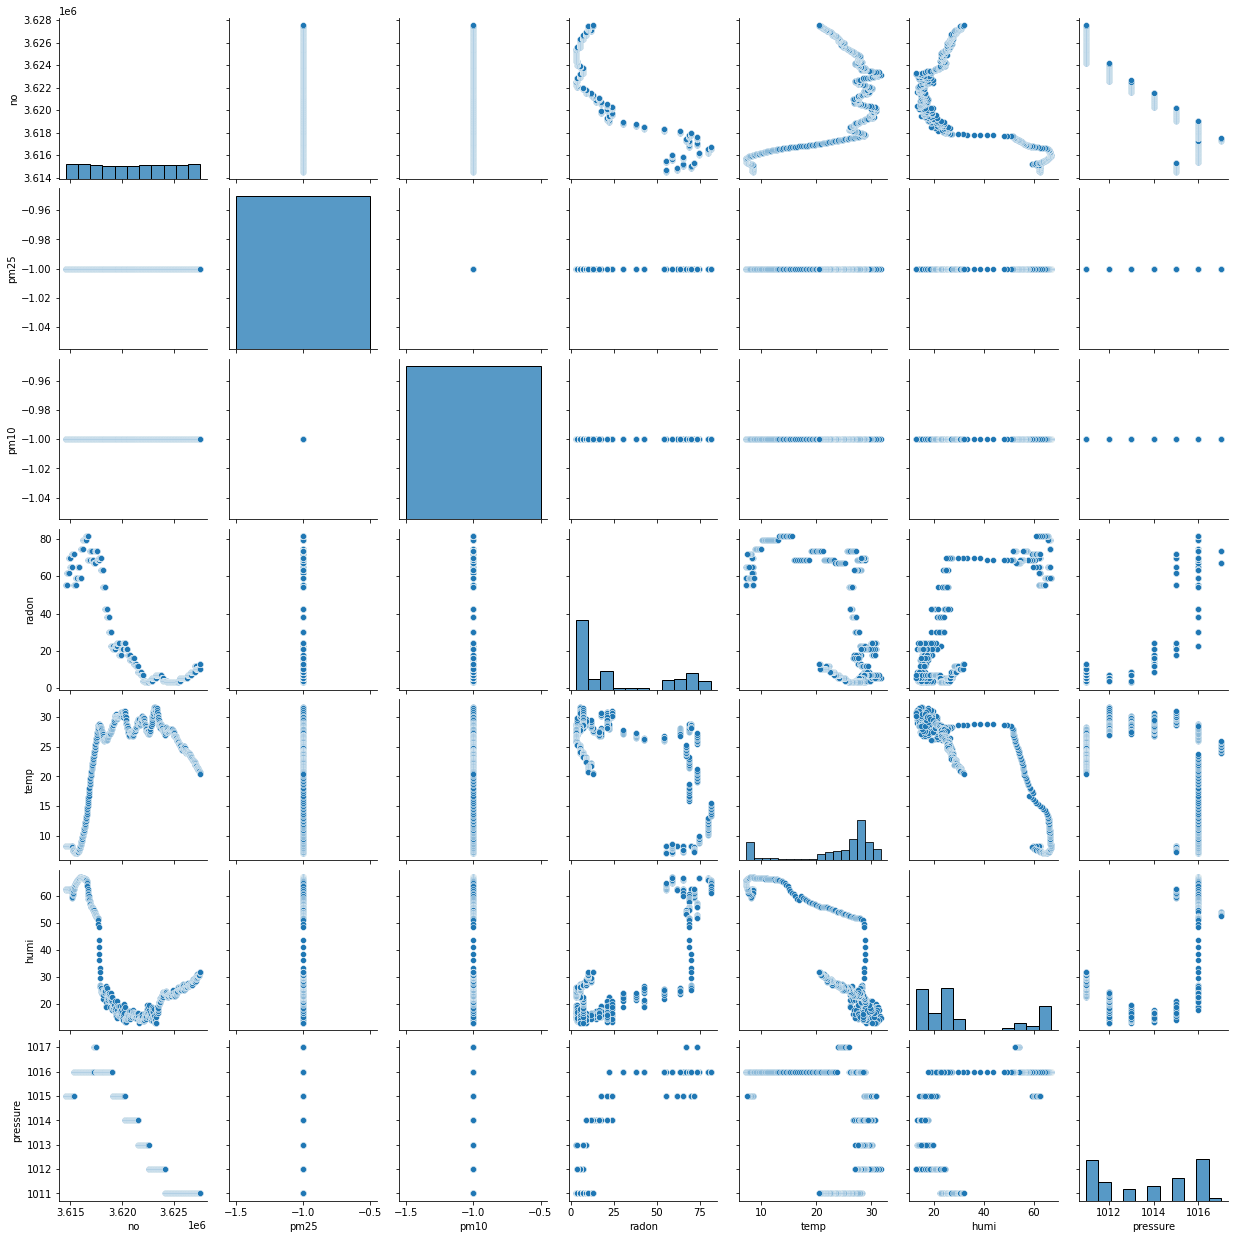

In [60]:
sns.pairplot(initDf)

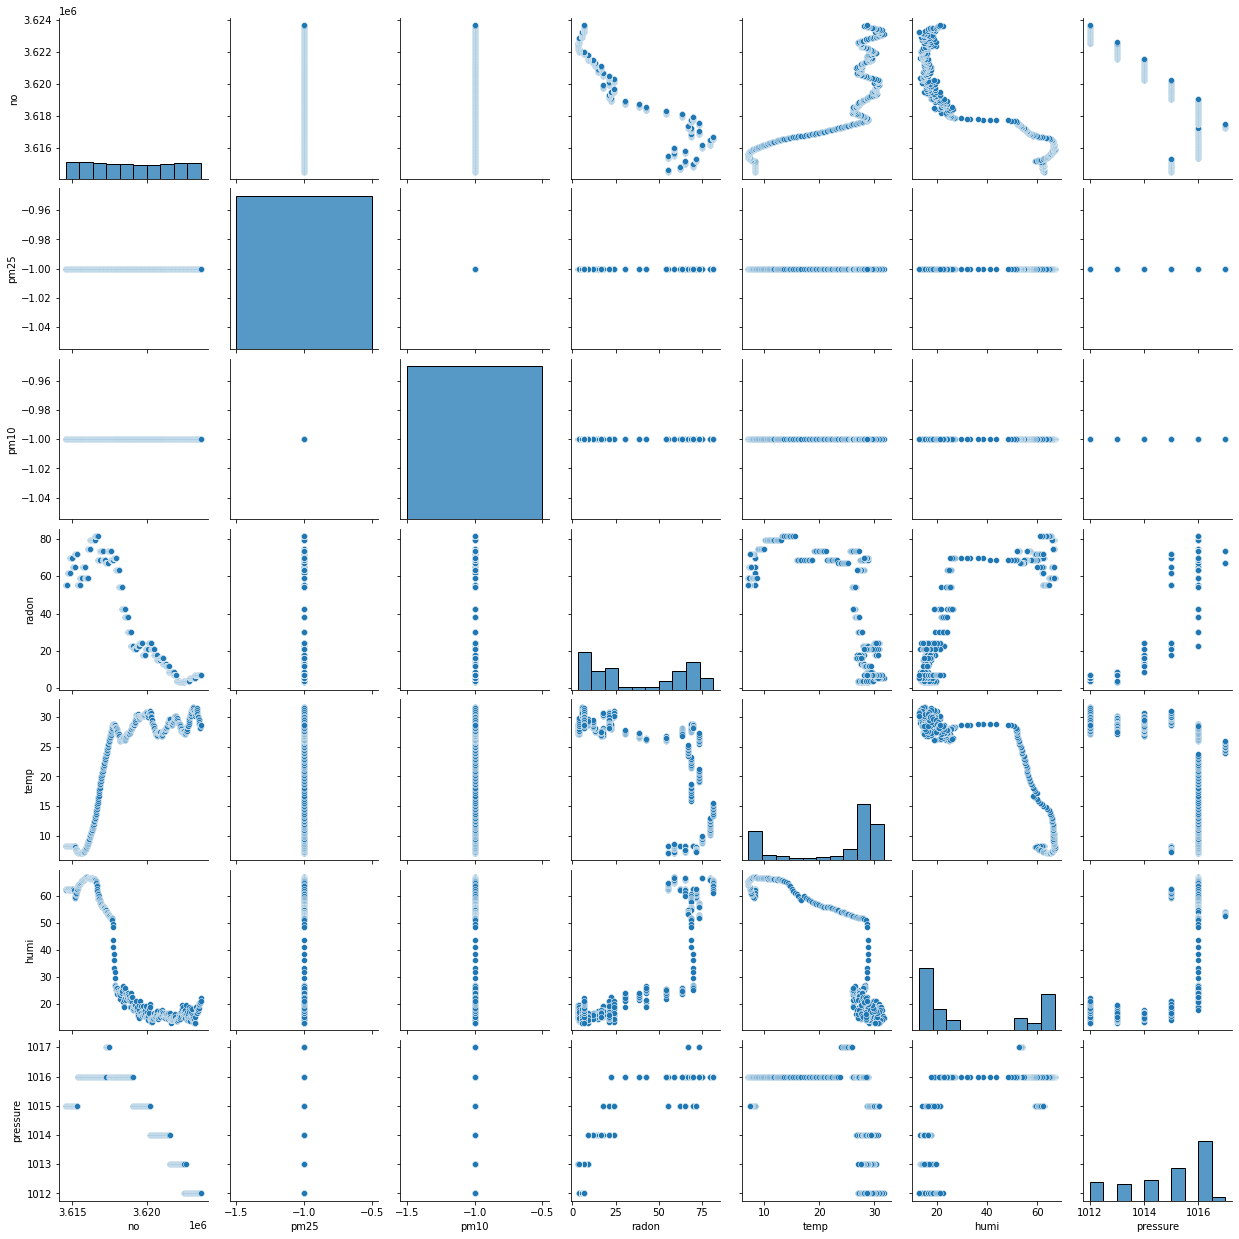

In [61]:
sns.pairplot(forenoonData)

### 오전 오후 라돈 습도 상관성

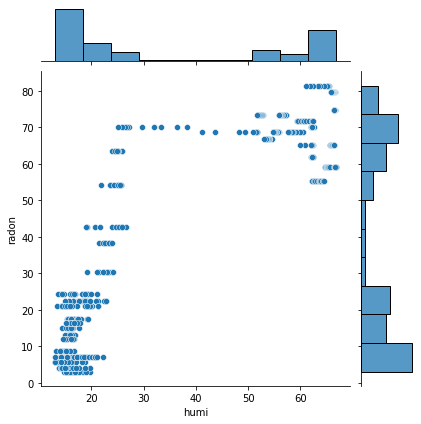

In [62]:
sns.jointplot(x='humi', y='radon', data=forenoonData)

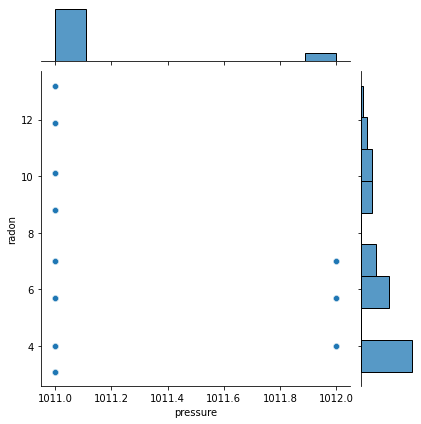

In [63]:
sns.jointplot(x='pressure', y='radon', data=afterData)

### 오전 오후 라돈 온도 상관성

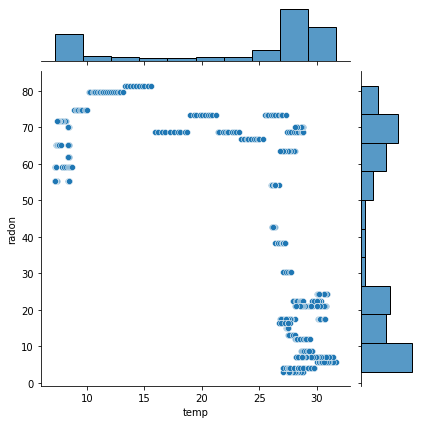

In [64]:
sns.jointplot(x='temp', y='radon', data=forenoonData)

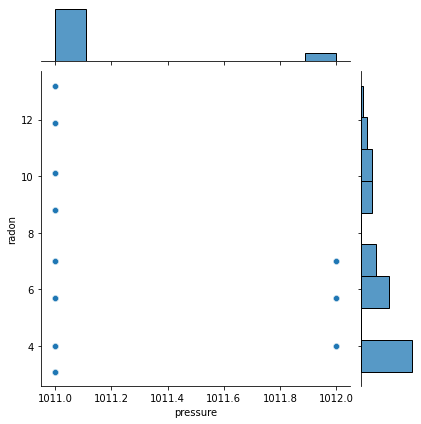

In [65]:
sns.jointplot(x='pressure', y='radon', data=afterData)

### 오전 오후 라돈 기압 상관성

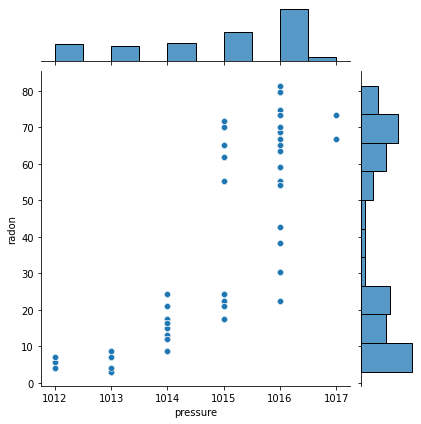

In [66]:
sns.jointplot(x='pressure', y='radon', data=forenoonData)

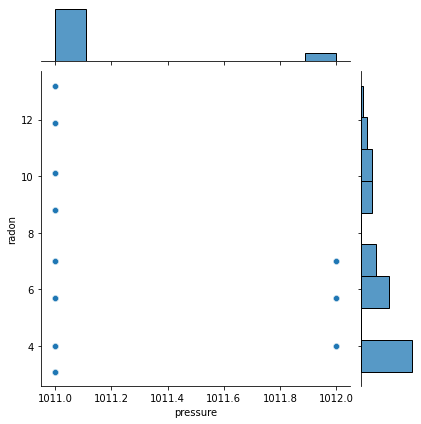

In [67]:
sns.jointplot(x='pressure', y='radon', data=afterData)

### relplot

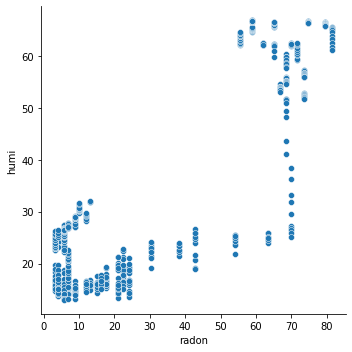

In [68]:
sns.relplot(x='radon', y='humi', data=initDf)

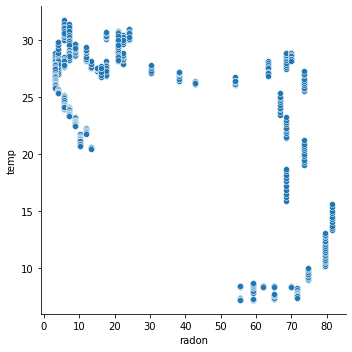

In [69]:
sns.relplot(x='radon', y='temp', data=initDf)

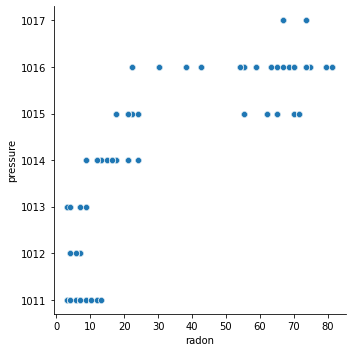

In [70]:
sns.relplot(x='radon', y='pressure', data=initDf)

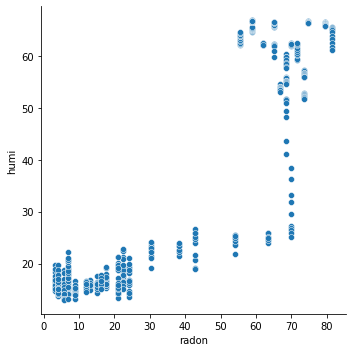

In [82]:
sns.relplot(x='radon', y='humi', data=foreRH)

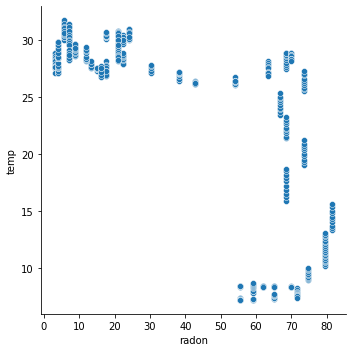

In [83]:
sns.relplot(x='radon', y='temp', data=foreRT)

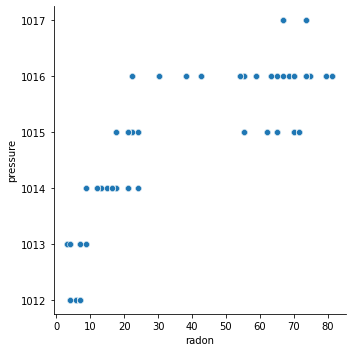

In [84]:
sns.relplot(x='radon', y='pressure', data=foreRP)

In [85]:
print(foreRP)

     radon  pressure
0     55.4    1015.0
1     55.4    1015.0
2     55.4    1015.0
3     55.4    1015.0
4     55.4    1015.0
..     ...       ...
495    7.0    1012.0
496    7.0    1012.0
497    7.0    1012.0
498    7.0    1012.0
499    7.0    1012.0

[500 rows x 2 columns]


In [86]:
forePress

,pressure
0,1015.0
1,1015.0
2,1015.0
3,1015.0
4,1015.0
...,...
495,1012.0
496,1012.0
497,1012.0
498,1012.0
